<a href="https://colab.research.google.com/github/Shalev001/NueralNetworkMadelbrotsetApproximation/blob/master/AIClubNumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# NumPy

In [ ]:
import numpy as np

What's most important for us to know about NumPy?
NumPy is a library that makes scientific math and linear algebra easy.
Native Python lists act as arrays, but they are slow. Arrays, also called matrices or tensors, in NumPy have a type of `ndarray` on which you can use a whole host of NumPy functions. It's also great for many linear algebra operations you should become comfortable with over time. They are a lot faster due to some cool computer sciency stuff related to memory. Pandas is also built on top of NumPy.

We can make an array of data in a few ways. Let's take a look at one of them using two functions: `np.arange` and `np.reshape`

In [ ]:
x = np.arange(12, dtype=np.int64).reshape(3, 4)
print(x)
print(x.shape)
print(type(x))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
<class 'numpy.ndarray'>


We create a matrix called x of type `ndarray` using `np.arange` and `np.reshape`.

`np.arange(12, dtype=np.int64)` creates a 1-dimensional array of numbers from 0 to 12, with a data type of int64. If you don't include it, the datatype is inferred through context, but essentially int64 allows for larger integers; if you'd like to learn more you can here https://numpy.org/doc/stable/user/basics.types.html#


`np.reshape(3, 4)` reshapes our original 1 x 12 matrix into a 3 x 4 matrix

Matrices are essential to machine learning so it is important to learn to understand and interpret their information. For example, `x[1]` accesses the 2nd row of data (index starts at 0)

In [ ]:
print(x[1])
print(x[1].shape)

[4 5 6 7]
(4,)


We can access columns by first specifying the desired row (':' indicates all rows) and specifying the desired column, returning a list of the returned values

In [ ]:
print(x[:, 0])
print(x[:, 0].shape)


[0 4 8]
(3,)


We can edit the values of specific entries. In this case we change all values from the second row to 0

In [ ]:
x[1] = 0
x

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [ 8,  9, 10, 11]])

We can make arrays in many ways. A very common way to initialize a matrix if you know its intended size is to use `np.zeros(rows, columns)`

In [ ]:
np.zeros(12).reshape(3,4)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
np.ones(12).reshape(3, 4)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

We can also make an array with anything we want, simply through `np.array([list])`

In [ ]:
a = np.array([1, 2, 3])
b = np.array(([1, 2, 3], [4, 5, 6])) # we need to encapsulate additional dimensions in a new set of brackets here
print(a)
print(b)

[1 2 3]
[[1 2 3]
 [4 5 6]]


There are a ton of linear algebra operations we can also use with NumPy such as `:ndarray.

We use Pandas and NumPy arrays in a similar way. NumPy is better for purely numerical data, while Pandas handles panel data.

Add information about transpose and sums, general matrix operations.

# PIL and matplotlib

We can also read and load images easily with the Python Imaging Library and NumPy

We read in the image using `Image.open('path')` and then we turn it into an `ndarray` object with `np.asarray`

In [ ]:
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab Notebooks/Brain Tumors/train/2_jpg.rf.fded76c07e967829600f3509288fdfe0.jpg')
img_np = np.asarray(img)
img_np

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Brain Tumors/train/2_jpg.rf.fded76c07e967829600f3509288fdfe0.jpg'

In [ ]:
print(type(img)) # It's very important to have an understanding of the different object types to avoid frustration down the line
print(type(img_np))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


os.listdir() is used to get the list of all files and directories in the specified directory. Using this method we can import all of the files in a folder with a for loop

In [ ]:
import os
img_list = [] #create an empty list that we can store our files in

for filename in os.listdir('/content/drive/MyDrive/Colab Notebooks/Brain Tumors/train'):
    if filename.endswith("jpg"):
      img_list.append(np.asarray(Image.open('/content/drive/MyDrive/Colab Notebooks/Brain Tumors/train/'+ filename)))

 Let's look at the shape of our images

In [ ]:
img_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
print(len(img_list))
print(type(img_list))

1502
<class 'list'>


The function `.shape` does not work with lists! This is why it's important to be aware of the types of the objects we are working with. What we want is an ndarray. We can achieve this with the `np.asarray(list)` function

In [ ]:
img_ndarray = np.asarray(img_list)
print(img_ndarray.shape)

(1502, 640, 640, 3)


Now we can see the dimensions of the list of images! We have `x` images with shape `l * w`. What is this `3`?

In [ ]:
img_ndarray[0].shape # We are looking at the shape of just the first image.
model_ready_image = img_ndarray[0].reshape(1, img_ndarray[0].shape[0], img_ndarray[0].shape[1], img_ndarray[0].shape[2])

(640, 640, 3)

In [ ]:
model_ready_image.shape

Matplotlib has a looottt of functions. It's quicker to import just pyplot for now, as it covers most of the functionality we need from matplotlib

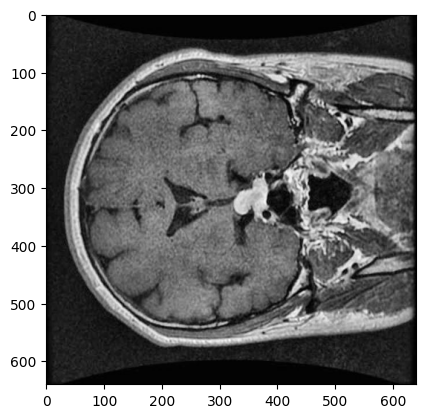

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_ndarray[0])

Add a section on glob, simple image processing techniques like black/white thresholding